In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
from sklearn import datasets

dfX, dfy = datasets.fetch_openml('boston', return_X_y=True)

In [2]:
df = pd.concat([dfX, dfy], axis=1)

print( df.head() )

"""
1978 보스턴 주택 가격 (MEDV)
506 타운의 주택 가격 중앙값 (단위 1,000 달러)

( 특징 데이터 )  
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율 
"""

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


'\n1978 보스턴 주택 가격 (MEDV)\n506 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n( 특징 데이터 )  \nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율 \n'

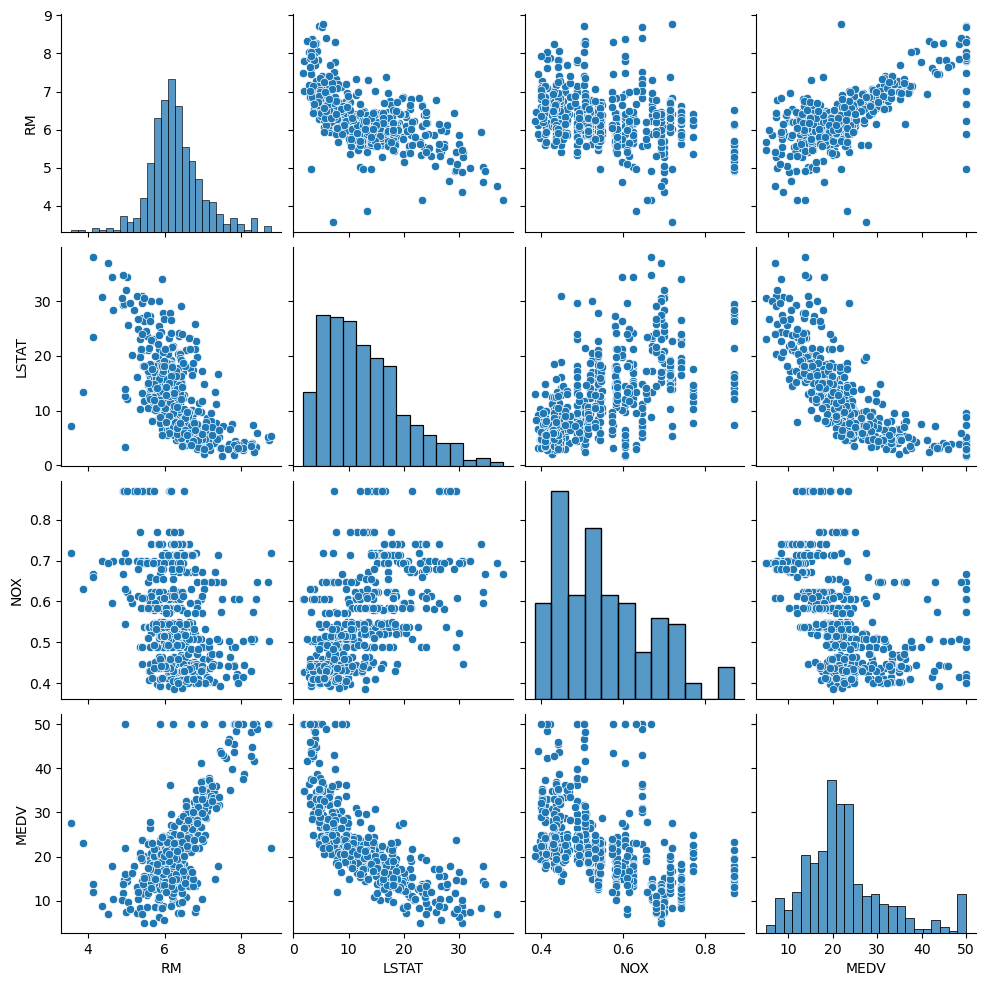

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df.loc[:, ["RM","LSTAT","NOX","MEDV"]] )
plt.show()

In [4]:
data = df[[ "RM","LSTAT","NOX"]]
label = df["MEDV"] 
print(data.head())
print(label.head())

      RM  LSTAT    NOX
0  6.575   4.98  0.538
1  6.421   9.14  0.469
2  7.185   4.03  0.469
3  6.998   2.94  0.458
4  7.147   5.33  0.458
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression( )
model = model.fit(data, label)

predict = model.predict([[6, 9.67, 0.573 ]]) # RM(방 수):6개,   LSTAT:9.67   NOX: 0.573
print("예측 집값 : ", predict)

예측 집값 :  [22.89854372]


In [35]:
print( model.coef_ )  #추정한 가중치 값
print( model.intercept_ )  #추정된 상수항

[ 5.12433498 -0.62287768 -1.84563095]
-0.7666924509023332


In [36]:
print ( model.score( data, label ) ) 
# 아래 계산 방법과 동일

0.6389103767491082


In [37]:
y_pred = model.predict(data)

score = 1 - ((label - y_pred)**2).sum() / ((label - label.mean())**2).sum()

print(score)

0.6389103767491082
